# Import Libraries

In [1]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [14]:
import seaborn as sns

# Load dataset

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

# shape
print("Shape: ",dataset.shape,"\n")

# head
print("First records of data:\n ",dataset.head(),"\n")

# class distribution
print(dataset.groupby('class').size())

Shape:  (150, 5) 

First records of data:
     sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Descriptions

In [13]:
print("General information about data:\n",dataset.info)

General information about data:
 <bound method DataFrame.info of      sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>


In [3]:
print("Statistical description of data:\n",dataset.describe())

Statistical description of data:
        sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# Number of Distinct Classes

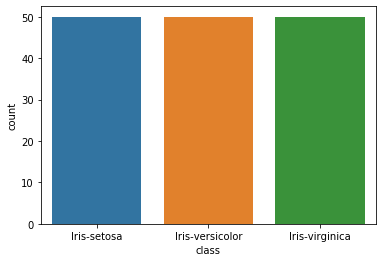

In [69]:
sns.countplot(x='class', data=dataset)

# Statistical Description of Features by Class

In [65]:
dataset.groupby('class').sepal_length.describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [66]:
dataset.groupby('class').sepal_width.describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [67]:
dataset.groupby('class').petal_length.describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [68]:
dataset.groupby('class').sepal_width.describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


# Box and Whisker plots

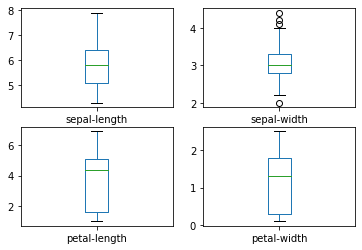

In [4]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# Histograms

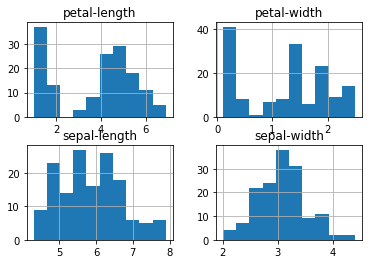

In [5]:
dataset.hist()
plt.show()

# Separation of Classes by Features

class
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: sepal_length, dtype: object

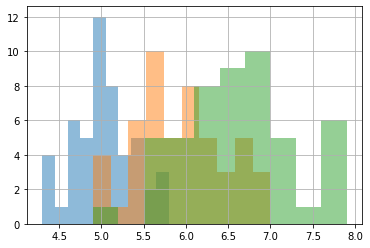

In [48]:
dataset.columns = [i.replace('-', '_') for i in dataset.columns]
#print("General information about data:\n",dataset.info)
dataset.groupby('class').sepal_length.hist(alpha=0.5)

class
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: sepal_width, dtype: object

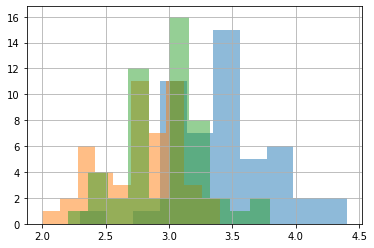

In [49]:
dataset.groupby('class').sepal_width.hist(alpha=0.5)

class
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: petal_length, dtype: object

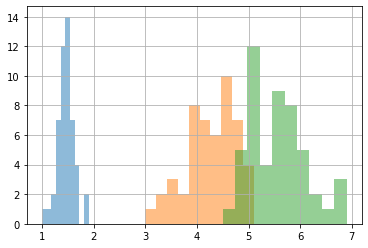

In [50]:
dataset.groupby('class').petal_length.hist(alpha=0.5)

class
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: petal_width, dtype: object

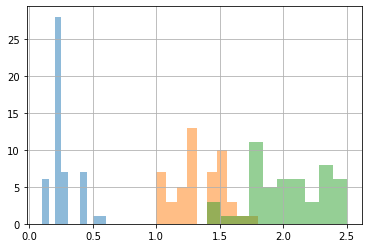

In [51]:
dataset.groupby('class').petal_width.hist(alpha=0.5)

# Typical Values of Features for each Class

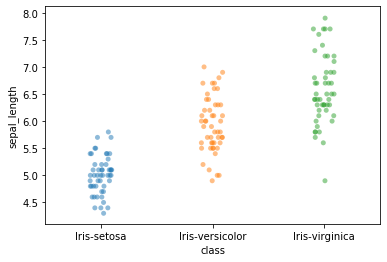

In [53]:
sns.stripplot(x='class', y='sepal_length', data=dataset, alpha=0.5, jitter=True)

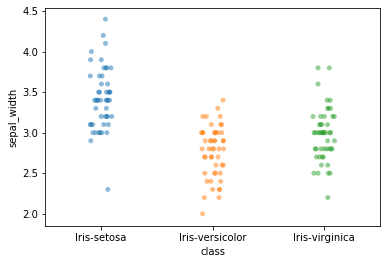

In [62]:
sns.stripplot(x='class', y='sepal_width', data=dataset, alpha=0.5, jitter=True)

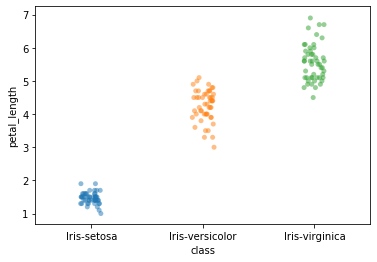

In [63]:
sns.stripplot(x='class', y='petal_length', data=dataset, alpha=0.5, jitter=True)

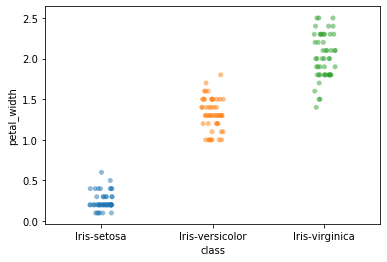

In [64]:
sns.stripplot(x='class', y='petal_width', data=dataset, alpha=0.5, jitter=True)

# Scatter plot matrix

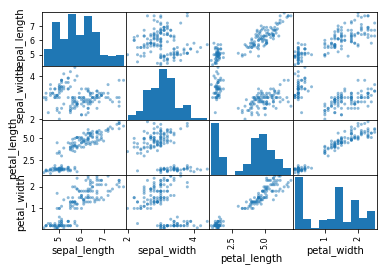

In [54]:
scatter_matrix(dataset)
plt.show()

# Separation of Classes by Clustering of Features

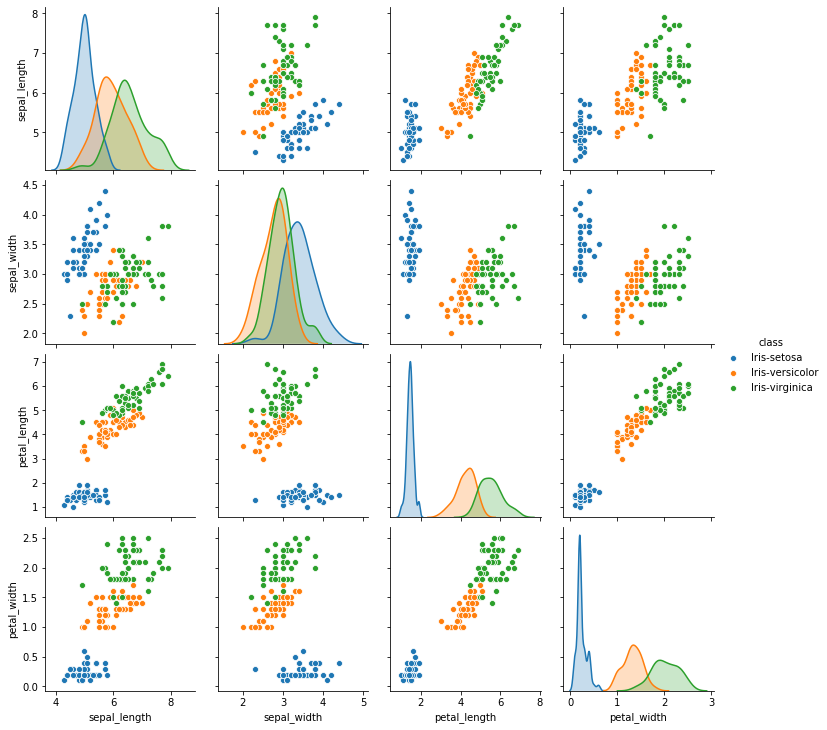

In [71]:
sns.pairplot(dataset, hue='class')

# Split-out validation dataset

In [55]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

# Create Model Shells (Instantiate them)

In [56]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Spot test each model with Cross-Validation

In [57]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/home/aashoormaram/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/aashoormaram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/aashoormaram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: 

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)


/home/aashoormaram/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/aashoormaram/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/aashoormaram/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/aashoormaram/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: S

RF: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.983333 (0.033333)


/home/aashoormaram/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/aashoormaram/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Graphical comparison of algorithms

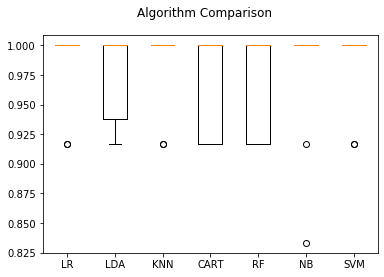

In [58]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Make predictions on validation dataset
K-Nearest Neighbors:

In [59]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



SVM - Support Vector Machine:

In [60]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [61]:
# More EDA